In [ ]:
# Import necessary libraries for data analysis, visualization, and machine learning

# pandas for data manipulation and analysis
import pandas as pd

# numpy for numerical computations
import numpy as np

# matplotlib.pyplot for creating visualizations
import matplotlib.pyplot as plt

# train_test_split for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# RandomForestRegressor for building a random forest regression model
from sklearn.ensemble import RandomForestRegressor

# DecisionTreeRegressor for building a decision tree regression model
from sklearn.tree import DecisionTreeRegressor

# XGBRegressor for building an XGBoost regression model
from xgboost import XGBRegressor

# mean_squared_error and r2_score for evaluating model performance
from sklearn.metrics import mean_squared_error, r2_score

# metrics module for various evaluation metrics
from sklearn import metrics

# StandardScaler for data standardization (scaling)
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data/solar_data.csv')

In [ ]:
#Info about the data
print(data.head())
print(data.shape)

   Month  Year   Solar
0      1  2015     NaN
1      2  2015     NaN
2      3  2015     NaN
3      4  2015  152.45
4      5  2015  160.88
(120, 3)


In [ ]:
#Drop the rows where solar power is 0
data = data[data['Solar'] != 0]

In [ ]:
data.head()

,Month,Year,Solar
0,1,2015,NaN
1,2,2015,NaN
2,3,2015,NaN
3,4,2015,152.45
4,5,2015,160.88


In [ ]:
#Drop the rows where solar power is not a number
data = data.dropna(subset=['Solar'])

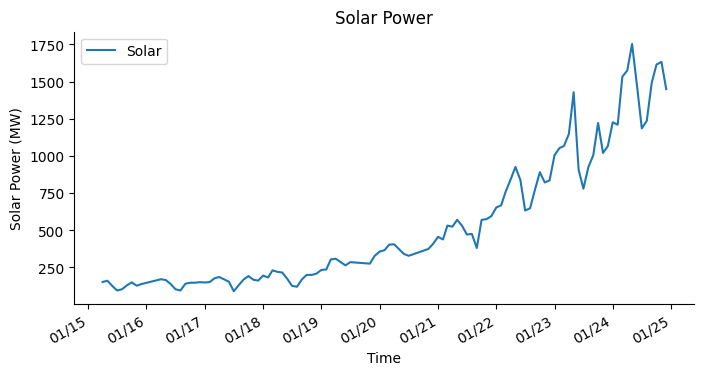

In [ ]:
# @title Wind Power
#Plot
from matplotlib import pyplot as plt
import matplotlib.dates as mdates # Import the mdates module

data['Time_datetime'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str) + '-01') # Assuming you have 'Year' and 'Month' columns


# Create the line plot
data.plot(x='Time_datetime', y='Solar', kind='line', figsize=(8, 4), title='Solar Power')

# Format the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))

plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel("Time")
plt.ylabel("Solar Power (MW)")
plt.show()

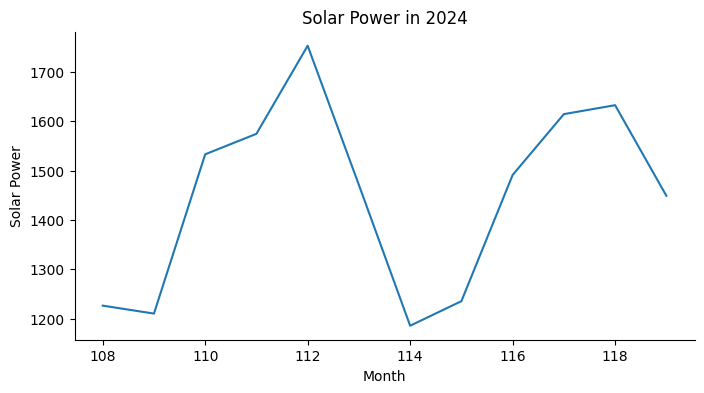

In [ ]:
from matplotlib import pyplot as plt
#Plot Solar power variation only for 2024
# Filter data for 2024
data_2015 = data[data['Year'] == 2024]

# Plot Wind Power for 2015
data_2015['Solar'].plot(kind='line', figsize=(8, 4), title='Solar Power in 2024')
plt.gca().spines[['top', 'right']].set_visible(False)  # Remove top and right spines
plt.xlabel("Month")  # Add x-axis label
plt.ylabel("Solar Power")  # Add y-axis label
plt.show()  # Display the plot

In [ ]:
# Handle cyclic month encoding

data['month_sin'] = np.sin(2 * np.pi * data['Month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['Month'] / 12)


#Yearly variation
data['Year_scaled'] = data['Year'] - data['Year'].min()
data['solar_policy_2015'] = np.where(data['Year'] >= 2016, 1, 0)
data['solar_policy_2021'] = np.where(data['Year'] >= 2021, 1, 0)
data['wind_solar_hybrid_policy_2018'] = np.where(data['Year'] >= 2018, 1, 0)
data['rooftop_solar_scheme_2019'] = np.where(data['Year'] >= 2019, 1, 0)

def modify_month_data(df):
    for index, row in df.iterrows():
        year = row['Year']
        month = row['Month']

        if year == 2016 or year == 2021 or year == 2018 or year == 2019:
            if month == 7:
                continue # Keep July as it is
            else:
                df.loc[index, 'Month'] = 0 # Set other months to 0
    return df

data = modify_month_data(data)
features = data[['Year_scaled','month_sin','month_cos','solar_policy_2015','solar_policy_2021','wind_solar_hybrid_policy_2018','rooftop_solar_scheme_2019']]

target = data['Solar']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
data.head()

,Month,Year,Solar,Time_datetime,month_sin,month_cos,Year_scaled,solar_policy_2015,solar_policy_2021,wind_solar_hybrid_policy_2018,rooftop_solar_scheme_2019
3,4,2015,152.45,2015-04-01,8.660254e-01,-0.500000,0,0,0,0,0
4,5,2015,160.88,2015-05-01,5.000000e-01,-0.866025,0,0,0,0,0
5,6,2015,125.86,2015-06-01,1.224647e-16,-1.000000,0,0,0,0,0
6,7,2015,95.12,2015-07-01,-5.000000e-01,-0.866025,0,0,0,0,0
7,8,2015,103.89,2015-08-01,-8.660254e-01,-0.500000,0,0,0,0,0


In [ ]:
print(type(X_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


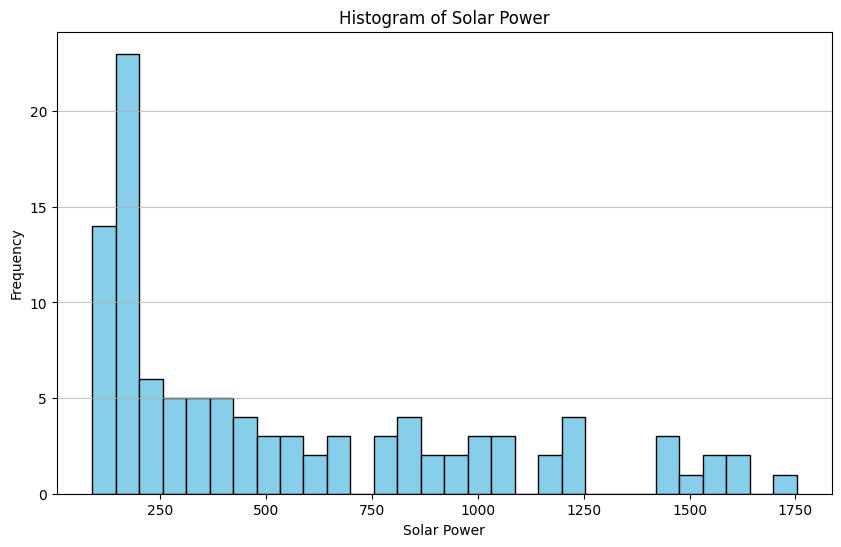

In [ ]:
# prompt: Generate a meaningful histrogram on the data dataframe

import matplotlib.pyplot as plt

# Assuming 'data' DataFrame is already loaded and processed as in the provided code

plt.figure(figsize=(10, 6))
plt.hist(data['Solar'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Solar Power')
plt.ylabel('Frequency')
plt.title('Histogram of Solar Power')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [ ]:
X_train

,Year_scaled,month_sin,month_cos,solar_policy_2015,solar_policy_2021,wind_solar_hybrid_policy_2018,rooftop_solar_scheme_2019
70,5,-5.000000e-01,8.660254e-01,1,0,1,1
29,2,1.224647e-16,-1.000000e+00,1,0,0,0
91,7,-8.660254e-01,-5.000000e-01,1,1,1,1
51,4,8.660254e-01,-5.000000e-01,1,0,1,1
87,7,8.660254e-01,-5.000000e-01,1,1,1,1
...,...,...,...,...,...,...,...
86,7,1.000000e+00,6.123234e-17,1,1,1,1
20,1,-1.000000e+00,-1.836970e-16,1,0,0,0
107,8,-2.449294e-16,1.000000e+00,1,1,1,1
62,5,1.000000e+00,6.123234e-17,1,0,1,1


In [ ]:
features

,Year_scaled,month_sin,month_cos,solar_policy_2015,solar_policy_2021,wind_solar_hybrid_policy_2018,rooftop_solar_scheme_2019
3,0,8.660254e-01,-5.000000e-01,0,0,0,0
4,0,5.000000e-01,-8.660254e-01,0,0,0,0
5,0,1.224647e-16,-1.000000e+00,0,0,0,0
6,0,-5.000000e-01,-8.660254e-01,0,0,0,0
7,0,-8.660254e-01,-5.000000e-01,0,0,0,0
...,...,...,...,...,...,...,...
115,9,-8.660254e-01,-5.000000e-01,1,1,1,1
116,9,-1.000000e+00,-1.836970e-16,1,1,1,1
117,9,-8.660254e-01,5.000000e-01,1,1,1,1
118,9,-5.000000e-01,8.660254e-01,1,1,1,1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# ... (Your existing code for data loading, preprocessing, and feature engineering) ...

# Define individual models
model1 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth=5, min_samples_split=5, min_samples_leaf=3, subsample=0.85, random_state=42)
model2 = RandomForestRegressor(n_estimators=200, random_state=42)
model3 = XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')

# Create the ensemble model
ensemble_model = VotingRegressor(estimators=[('gb', model1), ('rf', model2), ('xgb', model3)])

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)  # Use your training data here

# ... (Your existing code for creating future_data DataFrame) ...

# Make predictions using the ensemble model


# ... (Your existing code for plotting or further analysis) ...

VotingRegressor(estimators=[('gb',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       max_depth=5,
                                                       min_samples_leaf=3,
                                                       min_samples_split=5,
                                                       n_estimators=500,
                                                       random_state=42,
                                                       subsample=0.85)),
                            ('rf',
                             RandomForestRegressor(n_estimators=200,
                                                   random_state=42)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=Non...
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=100,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=42, ...))])

In [ ]:
y_pred = ensemble_model.predict(features)



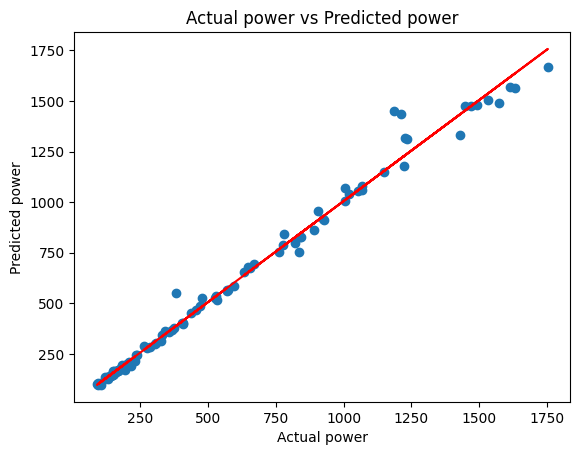

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ... (your existing code) ...

# Calculate best-fit line
m, b = np.polyfit(target, y_pred, 1)  # 1 for linear regression

# Create scatter plot with best-fit line
plt.scatter(target, y_pred)
plt.plot(target, m * target + b, color='red')  # Plot the best-fit line
plt.xlabel("Actual power")
plt.ylabel("Predicted power")
plt.title("Actual power vs Predicted power")
plt.show()

In [ ]:
#Evaluate the model on training data
mse = mean_squared_error(target, y_pred)
r2 = r2_score(target, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Train Prediction Std Dev: {np.std(y_pred):.4f}")

Mean Squared Error: 2179.23
R^2 Score: 0.99
Train Prediction Std Dev: 453.6011


In [ ]:
y_pred2 = ensemble_model.predict(X_test)

In [ ]:
#Evaluate the model on testing data
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Train Prediction Std Dev: {np.std(y_pred2):.4f}")

Mean Squared Error: 8298.85
R^2 Score: 0.96
Train Prediction Std Dev: 499.2253


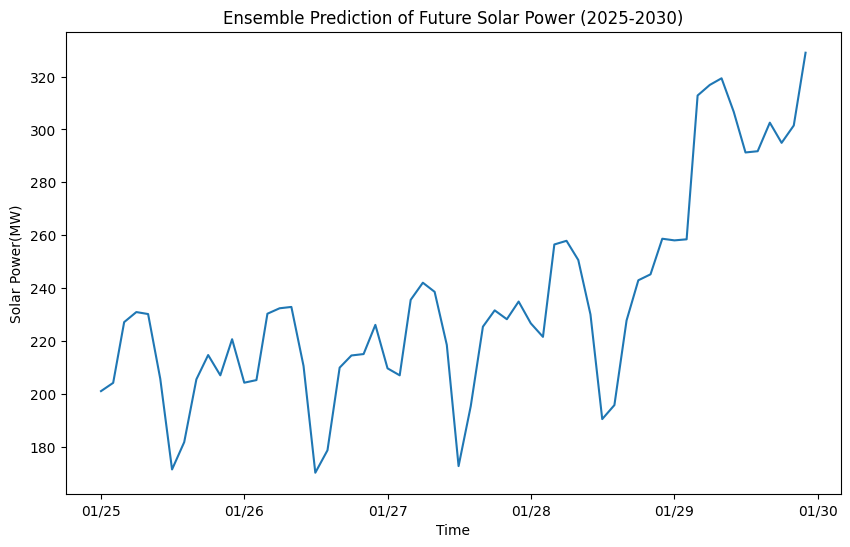

Future Prediction Std Dev: 38.8656
['Year_scaled', 'month_sin', 'month_cos', 'solar_policy_2015', 'solar_policy_2021', 'wind_solar_hybrid_policy_2018', 'rooftop_solar_scheme_2019']


In [ ]:
#Making future predictions by making new dataset for future years
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Future data
future_months = []
future_years = []


for year in range(2025, 2030):  # Include years 2025 to 2030
    for month in range(1, 13):
        future_years.append(year)
        future_months.append(month)
# Create DataFrame
future_data = pd.DataFrame({'Month': future_months, 'Year': future_years})

# Create Time feature if used during training
future_data['Time'] = future_data['Year'] * 12 + future_data['Month']


future_data['solar_policy_2015'] = 1
future_data['solar_policy_2021'] = 1
future_data['wind_solar_hybrid_policy_2018'] = 1
future_data['rooftop_solar_scheme_2019'] = 1



# Handle cyclic month encoding
future_data['month_sin'] = np.sin(2 * np.pi * future_data['Month'] / 12)
future_data['month_cos'] = np.cos(2 * np.pi * future_data['Month'] / 12)

future_data["Year_scaled"] = future_data["Year"] - future_data["Year"].min()

# Ensure features match training
features = ['Year_scaled','month_sin','month_cos','solar_policy_2015','solar_policy_2021','wind_solar_hybrid_policy_2018','rooftop_solar_scheme_2019']

future_energy = ensemble_model.predict(future_data[features])

future_data['Time_datetime'] = pd.to_datetime(future_data['Year'].astype(str) + '-' + future_data['Month'].astype(str) + '-01')

# # Filter data for 2025 to 2030
# future_data_filtered = future_data[(future_data['Year'] >= 2025) & (future_data['Year'] <= 2030)]

# Plot predictions with date formatting
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size if needed
ax.plot(future_data['Time_datetime'], future_energy)  # Assuming 'Wind Power Prediction' is the column name for predictions
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))  # Format x-axis as mm/yy
ax.set_xlabel("Time")
ax.set_ylabel("Solar Power(MW)")
ax.set_title("Ensemble Prediction of Future Solar Power (2025-2030)")
plt.show()

print(f"Future Prediction Std Dev: {np.std(future_energy):.4f}")
print(features)




Ensemble Model - Mean Squared Error: 8298.85
Ensemble Model - R^2 Score: 0.96
Ensemble Train Prediction Std Dev: 441.3314


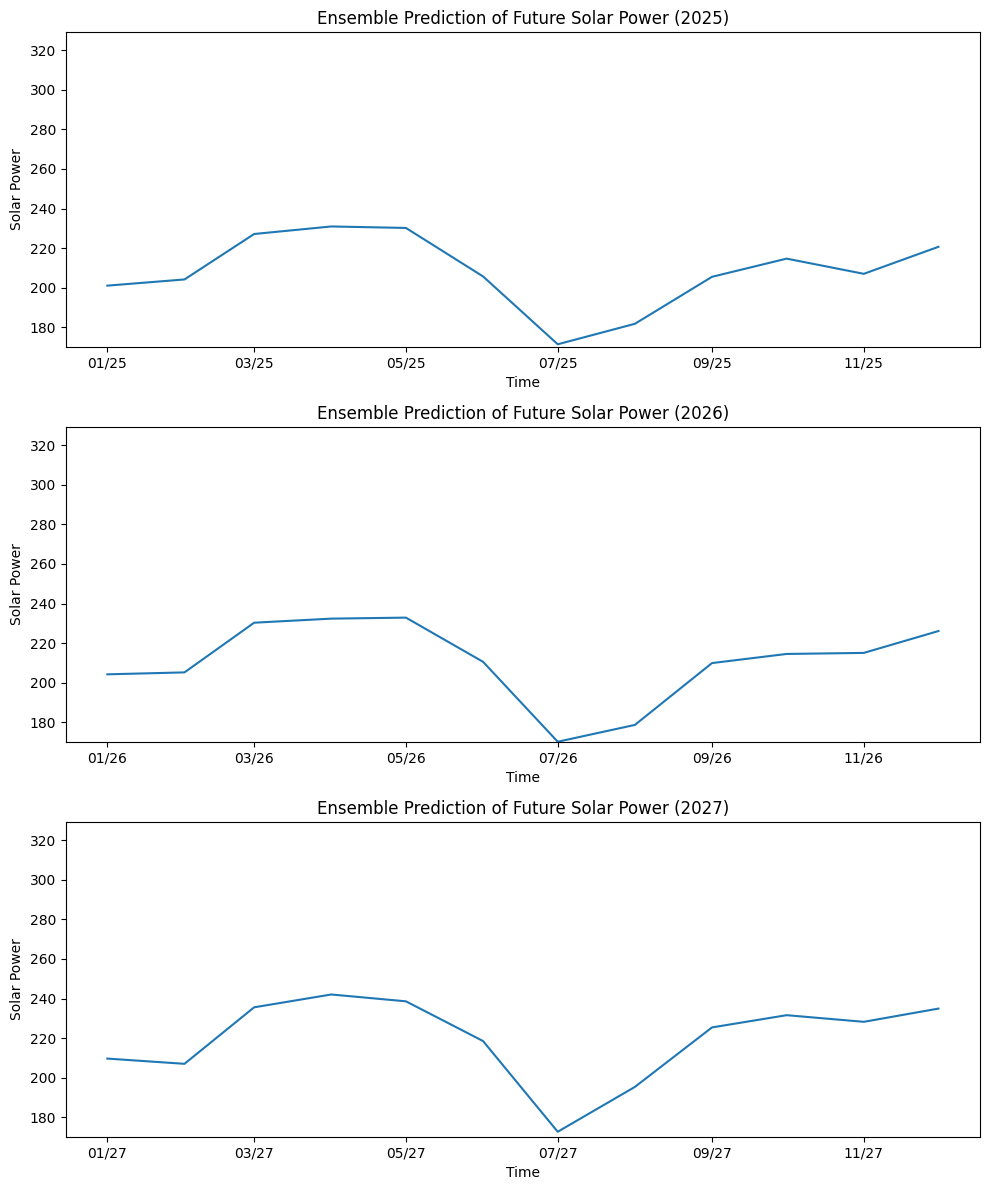

In [ ]:
# prompt: how to do ensemble modelling for this dataset and for predicting future values
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import VotingRegressor

# Define the individual models
model1 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth=5, min_samples_split=5, min_samples_leaf=3, subsample=0.85, random_state=42)
model2 = RandomForestRegressor(n_estimators=200, random_state=42)  # Example, adjust parameters as needed
model3 = XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror') # Example, adjust parameters as needed

# Create the ensemble model
ensemble_model = VotingRegressor(estimators=[('gb', model1), ('rf', model2), ('xgb', model3)])

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)


# Predictions
y_pred_ensemble = ensemble_model.predict(X_test)
y_pred_ensemble_train = ensemble_model.predict(X_train)

# Evaluation Metrics
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)
print(f"Ensemble Model - Mean Squared Error: {mse_ensemble:.2f}")
print(f"Ensemble Model - R^2 Score: {r2_ensemble:.2f}")
print(f"Ensemble Train Prediction Std Dev: {np.std(y_pred_ensemble_train):.4f}")

# Future Predictions with Ensemble
# Future Predictions with Ensemble
future_energy_ensemble = ensemble_model.predict(future_data[features])

# Convert 'Time' to datetime objects for proper formatting
future_data['Time_datetime'] = pd.to_datetime(future_data['Year'].astype(str) + '-' + future_data['Month'].astype(str) + '-01')

# Filter data for 2025, 2026, and 2027
future_data_2025 = future_data[future_data['Year'] == 2025]
future_data_2026 = future_data[future_data['Year'] == 2026]
future_data_2027 = future_data[future_data['Year'] == 2027]

# Find minimum and maximum values for y-axis range
y_min = min(future_energy_ensemble)
y_max = max(future_energy_ensemble)

# Create separate plots for each year with shared y-axis range
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))  # 3 rows, 1 column

# Plot for 2025
ax1.plot(future_data_2025['Time_datetime'], future_energy_ensemble[:12])  # First 12 predictions
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))  # Format x-axis as mm/yy
ax1.set_xlabel("Time")
ax1.set_ylabel("Solar Power")
ax1.set_title("Ensemble Prediction of Future Solar Power (2025)")
ax1.set_ylim([y_min, y_max])  # Set y-axis range

# Plot for 2026
ax2.plot(future_data_2026['Time_datetime'], future_energy_ensemble[12:24])  # Predictions 12 to 23
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))  # Format x-axis as mm/yy
ax2.set_xlabel("Time")
ax2.set_ylabel("Solar Power")
ax2.set_title("Ensemble Prediction of Future Solar Power (2026)")
ax2.set_ylim([y_min, y_max])  # Set y-axis range

# Plot for 2027
ax3.plot(future_data_2027['Time_datetime'], future_energy_ensemble[24:36])  # Predictions 24 to 35
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))  # Format x-axis as mm/yy
ax3.set_xlabel("Time")
ax3.set_ylabel("Solar Power")
ax3.set_title("Ensemble Prediction of Future Solar Power (2027)")
ax3.set_ylim([y_min, y_max])  # Set y-axis range

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [ ]:
!pip install openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Import mdates for date formatting
from openpyxl import Workbook

# ... (Your existing code for generating future_data and future_energy) ...

# Filter data for 2025 to 2030
future_data_2025_2030 = future_data[(future_data['Year'] >= 2025) & (future_data['Year'] <= 2030)]

# Create a new DataFrame with predictions and combined Month/Year column
predictions_df = pd.DataFrame({
    'Month/Year': pd.to_datetime(future_data_2025_2030['Year'].astype(str) + '-' + future_data_2025_2030['Month'].astype(str) + '-01').dt.strftime('%m/%Y'),
    'Predicted Solar Power (MW)': future_energy  # Use all future_energy values as it covers 2025-2030
})

# Create a new Excel workbook and sheet
workbook = Workbook()
sheet = workbook.active
sheet.title = 'Solar Power Predictions'

# Write headers to the sheet
sheet.append(['Month/Year', 'Predicted Solar Power (MW)'])

# Write data to the sheet
for index, row in predictions_df.iterrows():
    sheet.append([row['Month/Year'], row['Predicted Solar Power (MW)']])

# Save the workbook
workbook.save('solar_power_predictions_2025_2030.xlsx')